In [1]:
import numpy as np
from graph_generation import build_graph
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
data = np.load('../data/data_centered.npy', allow_pickle=True)

In [65]:
'''
input: time series data over WE as np array
ouput: graph that contains gridcells as nodes and an edge if correllation is sufficiently high
'''
threshold = 0.7

def build_graph(data): 
    t, lon, lat = data.shape[0], data.shape[1], data.shape[2]
    print(f"dimensions: longitude={lon}, latitude={lat}, timeseries={t}")
    graph = nx.Graph()
    
    # create nodes that consist of grid cell coordinates
    for i in range(lon):
        for j in range(lat):
            graph.add_node((i, j), pos=(2.5 * j -15 ,2.5 * i + 35))
    add_edges(graph, data)
    return graph

'''
compute correlation coefficient between the two given time series
'''
def add_edges(graph, data): 
    t, lon, lat = data.shape[0], data.shape[1], data.shape[2]
    already_seen = []
    for n1 in graph.nodes():
        t1 = data[:, n1[0], n1[1]]
        for n2 in graph.nodes():
            if n1 == n2: 
                continue
            t2 = data[:, n2[0], n2[1]]
            # corrcoef contains correlation matrix
            corr = np.corrcoef(t1, t2)[0][1]
            #print(f"first timeseries: {t1} \nsecond timeseries: {t2} \ncorrelation coefficient: {corr}")
            if corr >= threshold: 
                graph.add_edge(n1, n2)
        already_seen.append(n1)

## Experiments with a downsampled data set

In [66]:
small_data = np.round(data[:100,::10,::10]*10**4, 1)
print("dimensions of original data set", data.shape)
print("dimensions of downsampled data set: ", small_data.shape)
#print(f"time series at (0,0):{small_data[:,0,0]}\ntime series at (9,9):{small_data[:,9,9]}\n\n")
graph = build_graph(small_data)

Wall time: 0 ns
dimensions of original data set (507, 161, 221)
dimensions of downsampled data set:  (100, 17, 23)
dimensions: longitude=17, latitude=23, timeseries=100


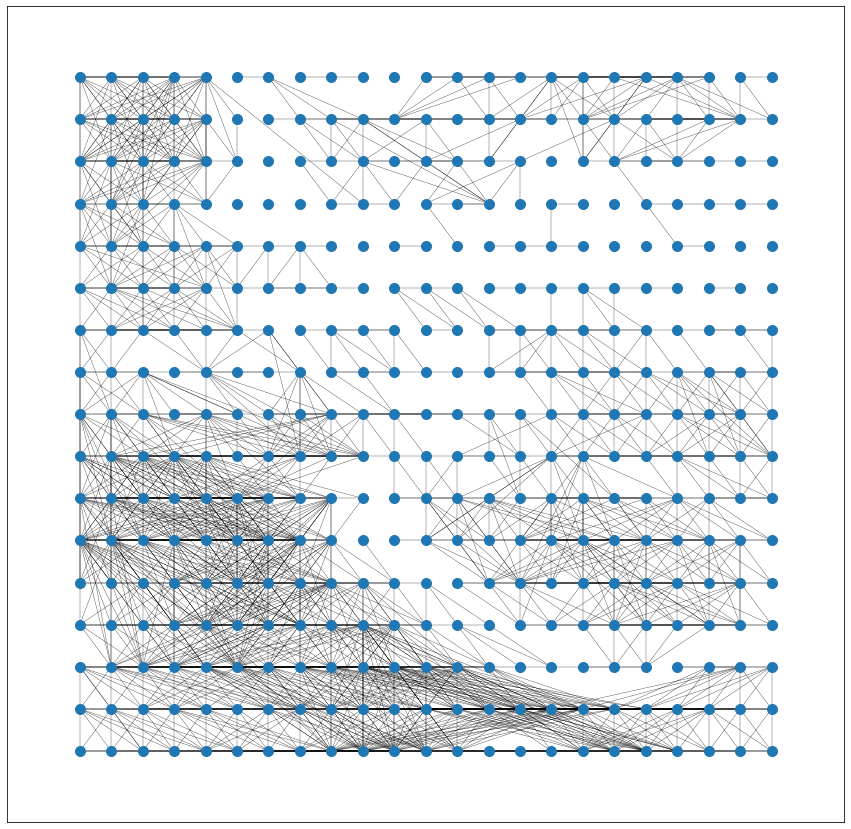

In [67]:
pos=nx.get_node_attributes(graph,'pos')
nx.draw_networkx_nodes(graph, pos=pos,node_size=100)
nx.draw_networkx_edges(graph, pos=pos,width=0.3)

plt.rcParams["figure.figsize"] = (15, 15)
plt.show()

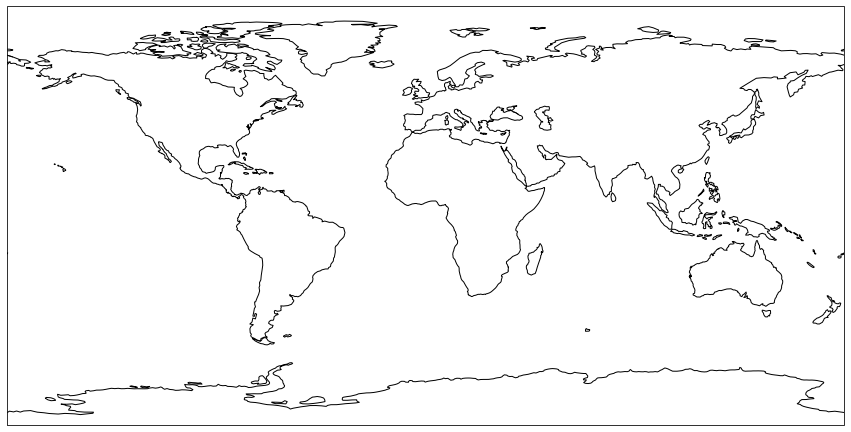

In [46]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()


plt.show()

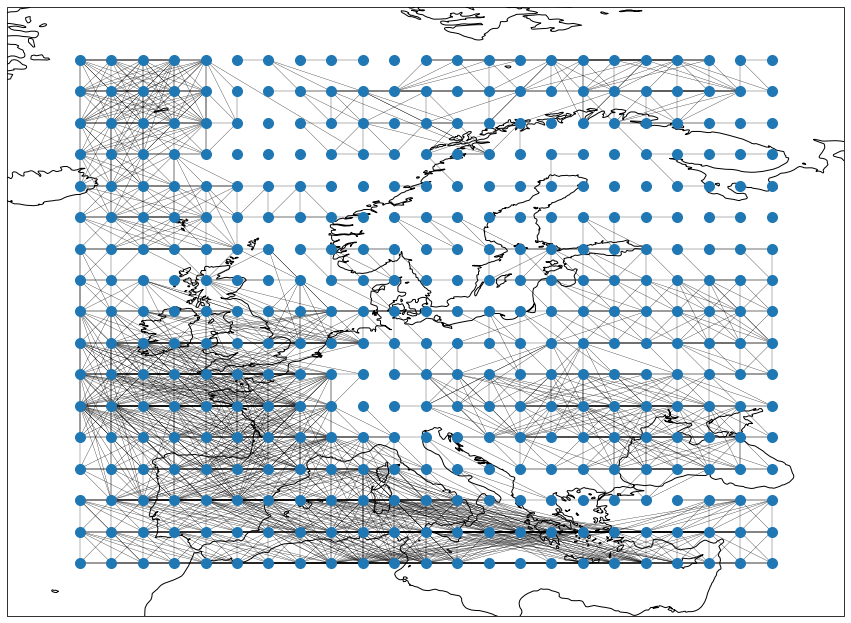

In [68]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()


pos=nx.get_node_attributes(graph,'pos')
# pos[(0, 0)] = (0.5, 0)
nx.draw_networkx_nodes(graph, pos=pos,node_size=100)
nx.draw_networkx_edges(graph, pos=pos,width=0.3)

# print(pos)

plt.show()